In [1]:
import pandas as pd
import numpy as np

In [2]:
# read the data
df_train = pd.read_json('data/train.json')
df_test = pd.read_json('data/test.json')

### Preprocessing

In [3]:
print('train shape:', df_train.shape)
print('train shape:', df_test.shape)

train shape: (39774, 3)
train shape: (9944, 2)


In [4]:
print(df_test.head())

      id                                        ingredients
0  18009  [baking powder, eggs, all-purpose flour, raisi...
1  28583  [sugar, egg yolks, corn starch, cream of tarta...
2  41580  [sausage links, fennel bulb, fronds, olive oil...
3  29752  [meat cuts, file powder, smoked sausage, okra,...
4  35687  [ground black pepper, salt, sausage casings, l...


In [5]:
print(df_train.head())

       cuisine     id                                        ingredients
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3       indian  22213                [water, vegetable oil, wheat, salt]
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...


In [6]:
print(df_train.cuisine.unique())

['greek' 'southern_us' 'filipino' 'indian' 'jamaican' 'spanish' 'italian'
 'mexican' 'chinese' 'british' 'thai' 'vietnamese' 'cajun_creole'
 'brazilian' 'french' 'japanese' 'irish' 'korean' 'moroccan' 'russian']


In [7]:
df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [8]:
# get all ingredients
def get_all_ingredients(df=df_train, col='ingredients', give_len=True):
    '''
    Returns all the unique objects in the lists of an Attribute.
    '''
    all_in = []
    for i in range(len(df[col])):
        for j in range(len(df[col].iloc[i])):
            all_in.append(df[col].iloc[i][j])
    all_in = np.array(all_in)
    print("Total no. of ingredients:", len(all_in))
    print("Total no. of unique ingredients:", len(set(all_in)))
    
    if give_len:
        return all_in, len(all_in), len(set(all_in))
    else:
        return all_in

In [9]:
all_ing, len_ing, len_ing_u = get_all_ingredients()

Total no. of ingredients: 428275
Total no. of unique ingredients: 6714


In [10]:
all_ing_test, len_ing_test, len_ing_u_test = get_all_ingredients(df_test)

Total no. of ingredients: 107395
Total no. of unique ingredients: 4484


In [12]:
#print(all_ingredients)

In [11]:
# check if "all ingredients in test" is a subset of "all ingredients in train"
flag = False
count=0
for ing in set(all_ing_test):
    if ing not in set(all_ing):
        flag=True
        count+=1
        print(ing)
if flag:
    print('Ingredient Missing!')

McCormick Garlic Powder
whole wheat spiral pasta
bottled peperoncini
activ dry quick rise yeast
Boursin Cheese with Garlic and Herbs
mccormick perfect pinch italian seasoning
dogfish
sweet potato squash
non-fat soymilk
Foster Farms chicken drumsticks
LiptonÂ® Cup Size Tea Bags
flowerets
ridged ziti
lettuce hearts
pumpkin pie filling
sour pickle
quick-cooking oatmeal
diced candied citron
fish bouillon cube
lean meat
light syrup
steamed bun flour
stir fry noodles
herbal tea
multigrain bread
carcass
pork strips
nonfat beef broth
dress russian
whole wheat wraps
Tuttorosso Peeled Plum Shaped Tomatoes
cured beef
laughing cow
crab leg
herb mix
crumble topping
shredded phyllo dough
potassium carbonate
breakfast pork sausage
Green Giantâ„¢ frozen chopped spinach
potato slider buns
phyllo sheets
star fruit
crushed ritz crackers
dried cilantro leaves
merguez
nonfat thousand island dressing
moscato d'asti
fraise
skin on salmon fillets
CURRY GUY Smoked Tandoori Masala
Franks Wings Sauce
farfallini


In [12]:
print(count, 'ingredients missing!')

423 ingredients missing!


In [54]:
print(df_train.cuisine.value_counts())

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64


Text(0.5,0,'Type of Cuisines')

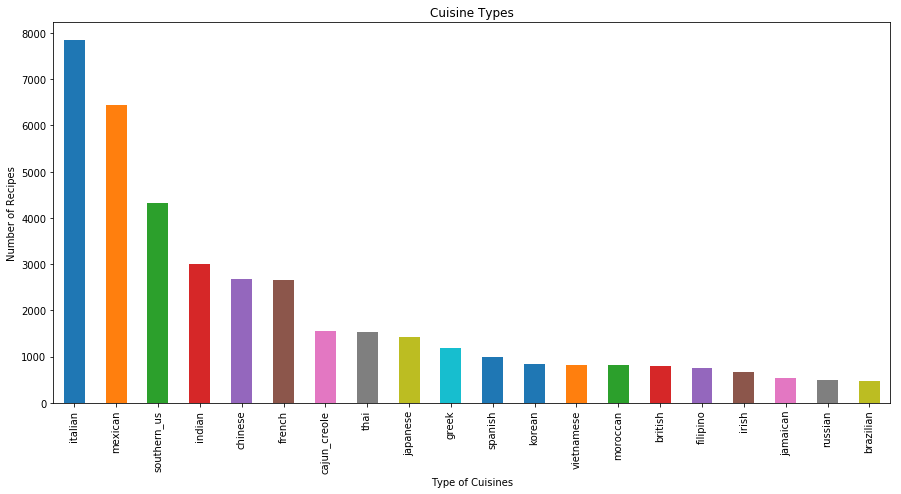

In [19]:
ax = df_train.cuisine.value_counts().plot(kind='bar', title='Cuisine Types', figsize=(15, 7))
ax.set_ylabel("Number of Recipes")
ax.set_xlabel("Type of Cuisines")

In [111]:
len_ing

428275

In [112]:
len_ing_u

6714

In [117]:
# creating an empty dataframe
df_train_temp = pd.DataFrame(np.zeros((df_train.shape[0], len_ing_u)), columns=set(all_ing))

In [135]:
df_train_temp.iloc[0]

whole wheat uncooked lasagna noodles      0.0
spicy brown mustard                       0.0
anise basil                               0.0
jambalaya                                 0.0
country style bread                       0.0
dried pappardelle                         0.0
beef rib short                            0.0
turkey broth                              0.0
crushed peppercorn                        0.0
sugar syrup                               0.0
wish bone red wine vinaigrett dress       0.0
bean curd                                 0.0
skinless boneless turkey breast halves    0.0
pointed peppers                           0.0
guacamole seasoning mix                   0.0
trout fillet                              0.0
distilled malt vinegar                    0.0
frozen broccoli florets                   0.0
tart filling                              0.0
frozen lima beans                         0.0
tostitos                                  0.0
yellow rock sugar                 

In [126]:
for i in range(df_train.shape[0]):
    get_all_ingredients
    for j in (df_train.ingredients[i]):
        df_train_temp.iloc[i][j] = 1
    print('loaded', i)

loaded 0
loaded 1
loaded 2
loaded 3
loaded 4
loaded 5
loaded 6
loaded 7
loaded 8
loaded 9
loaded 10
loaded 11
loaded 12
loaded 13
loaded 14
loaded 15
loaded 16
loaded 17
loaded 18
loaded 19
loaded 20
loaded 21
loaded 22
loaded 23
loaded 24
loaded 25
loaded 26
loaded 27
loaded 28
loaded 29
loaded 30
loaded 31
loaded 32
loaded 33
loaded 34
loaded 35
loaded 36
loaded 37
loaded 38
loaded 39
loaded 40
loaded 41
loaded 42
loaded 43
loaded 44
loaded 45
loaded 46
loaded 47
loaded 48
loaded 49
loaded 50
loaded 51
loaded 52
loaded 53
loaded 54
loaded 55
loaded 56
loaded 57
loaded 58
loaded 59
loaded 60
loaded 61
loaded 62
loaded 63
loaded 64
loaded 65
loaded 66
loaded 67
loaded 68
loaded 69
loaded 70
loaded 71
loaded 72
loaded 73
loaded 74
loaded 75
loaded 76
loaded 77
loaded 78
loaded 79
loaded 80
loaded 81
loaded 82
loaded 83
loaded 84
loaded 85
loaded 86
loaded 87
loaded 88
loaded 89
loaded 90
loaded 91
loaded 92
loaded 93
loaded 94
loaded 95
loaded 96
loaded 97
loaded 98
loaded 99
loaded 100

loaded 901
loaded 902
loaded 903
loaded 904
loaded 905
loaded 906
loaded 907
loaded 908
loaded 909
loaded 910
loaded 911
loaded 912
loaded 913
loaded 914
loaded 915
loaded 916
loaded 917
loaded 918
loaded 919
loaded 920
loaded 921
loaded 922
loaded 923
loaded 924
loaded 925
loaded 926
loaded 927
loaded 928
loaded 929
loaded 930
loaded 931
loaded 932
loaded 933
loaded 934
loaded 935
loaded 936
loaded 937
loaded 938
loaded 939
loaded 940
loaded 941
loaded 942
loaded 943
loaded 944
loaded 945
loaded 946
loaded 947
loaded 948
loaded 949
loaded 950
loaded 951
loaded 952
loaded 953
loaded 954
loaded 955
loaded 956
loaded 957
loaded 958
loaded 959
loaded 960
loaded 961
loaded 962
loaded 963
loaded 964
loaded 965
loaded 966
loaded 967
loaded 968
loaded 969
loaded 970
loaded 971
loaded 972
loaded 973
loaded 974
loaded 975
loaded 976
loaded 977
loaded 978
loaded 979
loaded 980
loaded 981
loaded 982
loaded 983
loaded 984
loaded 985
loaded 986
loaded 987
loaded 988
loaded 989
loaded 990
loaded 991

loaded 1651
loaded 1652
loaded 1653
loaded 1654
loaded 1655
loaded 1656
loaded 1657
loaded 1658
loaded 1659
loaded 1660
loaded 1661
loaded 1662
loaded 1663
loaded 1664
loaded 1665
loaded 1666
loaded 1667
loaded 1668
loaded 1669
loaded 1670
loaded 1671
loaded 1672
loaded 1673
loaded 1674
loaded 1675
loaded 1676
loaded 1677
loaded 1678
loaded 1679
loaded 1680
loaded 1681
loaded 1682
loaded 1683
loaded 1684
loaded 1685
loaded 1686
loaded 1687
loaded 1688
loaded 1689
loaded 1690
loaded 1691
loaded 1692
loaded 1693
loaded 1694
loaded 1695
loaded 1696
loaded 1697
loaded 1698
loaded 1699
loaded 1700
loaded 1701
loaded 1702
loaded 1703
loaded 1704
loaded 1705
loaded 1706
loaded 1707
loaded 1708
loaded 1709
loaded 1710
loaded 1711
loaded 1712
loaded 1713
loaded 1714
loaded 1715
loaded 1716
loaded 1717
loaded 1718
loaded 1719
loaded 1720
loaded 1721
loaded 1722
loaded 1723
loaded 1724
loaded 1725
loaded 1726
loaded 1727
loaded 1728
loaded 1729
loaded 1730
loaded 1731
loaded 1732
loaded 1733
load

loaded 2400
loaded 2401
loaded 2402
loaded 2403
loaded 2404
loaded 2405
loaded 2406
loaded 2407
loaded 2408
loaded 2409
loaded 2410
loaded 2411
loaded 2412
loaded 2413
loaded 2414
loaded 2415
loaded 2416
loaded 2417
loaded 2418
loaded 2419
loaded 2420
loaded 2421
loaded 2422
loaded 2423
loaded 2424
loaded 2425
loaded 2426
loaded 2427
loaded 2428
loaded 2429
loaded 2430
loaded 2431
loaded 2432
loaded 2433
loaded 2434
loaded 2435
loaded 2436
loaded 2437
loaded 2438
loaded 2439
loaded 2440
loaded 2441
loaded 2442
loaded 2443
loaded 2444
loaded 2445
loaded 2446
loaded 2447
loaded 2448
loaded 2449
loaded 2450
loaded 2451
loaded 2452
loaded 2453
loaded 2454
loaded 2455
loaded 2456
loaded 2457
loaded 2458
loaded 2459
loaded 2460
loaded 2461
loaded 2462
loaded 2463
loaded 2464
loaded 2465
loaded 2466
loaded 2467
loaded 2468
loaded 2469
loaded 2470
loaded 2471
loaded 2472
loaded 2473
loaded 2474
loaded 2475
loaded 2476
loaded 2477
loaded 2478
loaded 2479
loaded 2480
loaded 2481
loaded 2482
load

loaded 3149
loaded 3150
loaded 3151
loaded 3152
loaded 3153
loaded 3154
loaded 3155
loaded 3156
loaded 3157
loaded 3158
loaded 3159
loaded 3160
loaded 3161
loaded 3162
loaded 3163
loaded 3164
loaded 3165
loaded 3166
loaded 3167
loaded 3168
loaded 3169
loaded 3170
loaded 3171
loaded 3172
loaded 3173
loaded 3174
loaded 3175
loaded 3176
loaded 3177
loaded 3178
loaded 3179
loaded 3180
loaded 3181
loaded 3182
loaded 3183
loaded 3184
loaded 3185
loaded 3186
loaded 3187
loaded 3188
loaded 3189
loaded 3190
loaded 3191
loaded 3192
loaded 3193
loaded 3194
loaded 3195
loaded 3196
loaded 3197
loaded 3198
loaded 3199
loaded 3200
loaded 3201
loaded 3202
loaded 3203
loaded 3204
loaded 3205
loaded 3206
loaded 3207
loaded 3208
loaded 3209
loaded 3210
loaded 3211
loaded 3212
loaded 3213
loaded 3214
loaded 3215
loaded 3216
loaded 3217
loaded 3218
loaded 3219
loaded 3220
loaded 3221
loaded 3222
loaded 3223
loaded 3224
loaded 3225
loaded 3226
loaded 3227
loaded 3228
loaded 3229
loaded 3230
loaded 3231
load

loaded 3898
loaded 3899
loaded 3900
loaded 3901
loaded 3902
loaded 3903
loaded 3904
loaded 3905
loaded 3906
loaded 3907
loaded 3908
loaded 3909
loaded 3910
loaded 3911
loaded 3912
loaded 3913
loaded 3914
loaded 3915
loaded 3916
loaded 3917
loaded 3918
loaded 3919
loaded 3920
loaded 3921
loaded 3922
loaded 3923
loaded 3924
loaded 3925
loaded 3926
loaded 3927
loaded 3928
loaded 3929
loaded 3930
loaded 3931
loaded 3932
loaded 3933
loaded 3934
loaded 3935
loaded 3936
loaded 3937
loaded 3938
loaded 3939
loaded 3940
loaded 3941
loaded 3942
loaded 3943
loaded 3944
loaded 3945
loaded 3946
loaded 3947
loaded 3948
loaded 3949
loaded 3950
loaded 3951
loaded 3952
loaded 3953
loaded 3954
loaded 3955
loaded 3956
loaded 3957
loaded 3958
loaded 3959
loaded 3960
loaded 3961
loaded 3962
loaded 3963
loaded 3964
loaded 3965
loaded 3966
loaded 3967
loaded 3968
loaded 3969
loaded 3970
loaded 3971
loaded 3972
loaded 3973
loaded 3974
loaded 3975
loaded 3976
loaded 3977
loaded 3978
loaded 3979
loaded 3980
load

loaded 4648
loaded 4649
loaded 4650
loaded 4651
loaded 4652
loaded 4653
loaded 4654
loaded 4655
loaded 4656
loaded 4657
loaded 4658
loaded 4659
loaded 4660
loaded 4661
loaded 4662
loaded 4663
loaded 4664
loaded 4665
loaded 4666
loaded 4667
loaded 4668
loaded 4669
loaded 4670
loaded 4671
loaded 4672
loaded 4673
loaded 4674
loaded 4675
loaded 4676
loaded 4677
loaded 4678
loaded 4679
loaded 4680
loaded 4681
loaded 4682
loaded 4683
loaded 4684
loaded 4685
loaded 4686
loaded 4687
loaded 4688
loaded 4689
loaded 4690
loaded 4691
loaded 4692
loaded 4693
loaded 4694
loaded 4695
loaded 4696
loaded 4697
loaded 4698
loaded 4699
loaded 4700
loaded 4701
loaded 4702
loaded 4703
loaded 4704
loaded 4705
loaded 4706
loaded 4707
loaded 4708
loaded 4709
loaded 4710
loaded 4711
loaded 4712
loaded 4713
loaded 4714
loaded 4715
loaded 4716
loaded 4717
loaded 4718
loaded 4719
loaded 4720
loaded 4721
loaded 4722
loaded 4723
loaded 4724
loaded 4725
loaded 4726
loaded 4727
loaded 4728
loaded 4729
loaded 4730
load

loaded 5385
loaded 5386
loaded 5387
loaded 5388
loaded 5389
loaded 5390
loaded 5391
loaded 5392
loaded 5393
loaded 5394
loaded 5395
loaded 5396
loaded 5397
loaded 5398
loaded 5399
loaded 5400
loaded 5401
loaded 5402
loaded 5403
loaded 5404
loaded 5405
loaded 5406
loaded 5407
loaded 5408
loaded 5409
loaded 5410
loaded 5411
loaded 5412
loaded 5413
loaded 5414
loaded 5415
loaded 5416
loaded 5417
loaded 5418
loaded 5419
loaded 5420
loaded 5421
loaded 5422
loaded 5423
loaded 5424
loaded 5425
loaded 5426
loaded 5427
loaded 5428
loaded 5429
loaded 5430
loaded 5431
loaded 5432
loaded 5433
loaded 5434
loaded 5435
loaded 5436
loaded 5437
loaded 5438
loaded 5439
loaded 5440
loaded 5441
loaded 5442
loaded 5443
loaded 5444
loaded 5445
loaded 5446
loaded 5447
loaded 5448
loaded 5449
loaded 5450
loaded 5451
loaded 5452
loaded 5453
loaded 5454
loaded 5455
loaded 5456
loaded 5457
loaded 5458
loaded 5459
loaded 5460
loaded 5461
loaded 5462
loaded 5463
loaded 5464
loaded 5465
loaded 5466
loaded 5467
load

loaded 6146
loaded 6147
loaded 6148
loaded 6149
loaded 6150
loaded 6151
loaded 6152
loaded 6153
loaded 6154
loaded 6155
loaded 6156
loaded 6157
loaded 6158
loaded 6159
loaded 6160
loaded 6161
loaded 6162
loaded 6163
loaded 6164
loaded 6165
loaded 6166
loaded 6167
loaded 6168
loaded 6169
loaded 6170
loaded 6171
loaded 6172
loaded 6173
loaded 6174
loaded 6175
loaded 6176
loaded 6177
loaded 6178
loaded 6179
loaded 6180
loaded 6181
loaded 6182
loaded 6183
loaded 6184
loaded 6185
loaded 6186
loaded 6187
loaded 6188
loaded 6189
loaded 6190
loaded 6191
loaded 6192
loaded 6193
loaded 6194
loaded 6195
loaded 6196
loaded 6197
loaded 6198
loaded 6199
loaded 6200
loaded 6201
loaded 6202
loaded 6203
loaded 6204
loaded 6205
loaded 6206
loaded 6207
loaded 6208
loaded 6209
loaded 6210
loaded 6211
loaded 6212
loaded 6213
loaded 6214
loaded 6215
loaded 6216
loaded 6217
loaded 6218
loaded 6219
loaded 6220
loaded 6221
loaded 6222
loaded 6223
loaded 6224
loaded 6225
loaded 6226
loaded 6227
loaded 6228
load

loaded 6895
loaded 6896
loaded 6897
loaded 6898
loaded 6899
loaded 6900
loaded 6901
loaded 6902
loaded 6903
loaded 6904
loaded 6905
loaded 6906
loaded 6907
loaded 6908
loaded 6909
loaded 6910
loaded 6911
loaded 6912
loaded 6913
loaded 6914
loaded 6915
loaded 6916
loaded 6917
loaded 6918
loaded 6919
loaded 6920
loaded 6921
loaded 6922
loaded 6923
loaded 6924
loaded 6925
loaded 6926
loaded 6927
loaded 6928
loaded 6929
loaded 6930
loaded 6931
loaded 6932
loaded 6933
loaded 6934
loaded 6935
loaded 6936
loaded 6937
loaded 6938
loaded 6939
loaded 6940
loaded 6941
loaded 6942
loaded 6943
loaded 6944
loaded 6945
loaded 6946
loaded 6947
loaded 6948
loaded 6949
loaded 6950
loaded 6951
loaded 6952
loaded 6953
loaded 6954
loaded 6955
loaded 6956
loaded 6957
loaded 6958
loaded 6959
loaded 6960
loaded 6961
loaded 6962
loaded 6963
loaded 6964
loaded 6965
loaded 6966
loaded 6967
loaded 6968
loaded 6969
loaded 6970
loaded 6971
loaded 6972
loaded 6973
loaded 6974
loaded 6975
loaded 6976
loaded 6977
load

loaded 7645
loaded 7646
loaded 7647
loaded 7648
loaded 7649
loaded 7650
loaded 7651
loaded 7652
loaded 7653
loaded 7654
loaded 7655
loaded 7656
loaded 7657
loaded 7658
loaded 7659
loaded 7660
loaded 7661
loaded 7662
loaded 7663
loaded 7664
loaded 7665
loaded 7666
loaded 7667
loaded 7668
loaded 7669
loaded 7670
loaded 7671
loaded 7672
loaded 7673
loaded 7674
loaded 7675
loaded 7676
loaded 7677
loaded 7678
loaded 7679
loaded 7680
loaded 7681
loaded 7682
loaded 7683
loaded 7684
loaded 7685
loaded 7686
loaded 7687
loaded 7688
loaded 7689
loaded 7690
loaded 7691
loaded 7692
loaded 7693
loaded 7694
loaded 7695
loaded 7696
loaded 7697
loaded 7698
loaded 7699
loaded 7700
loaded 7701
loaded 7702
loaded 7703
loaded 7704
loaded 7705
loaded 7706
loaded 7707
loaded 7708
loaded 7709
loaded 7710
loaded 7711
loaded 7712
loaded 7713
loaded 7714
loaded 7715
loaded 7716
loaded 7717
loaded 7718
loaded 7719
loaded 7720
loaded 7721
loaded 7722
loaded 7723
loaded 7724
loaded 7725
loaded 7726
loaded 7727
load

loaded 8394
loaded 8395
loaded 8396
loaded 8397
loaded 8398
loaded 8399
loaded 8400
loaded 8401
loaded 8402
loaded 8403
loaded 8404
loaded 8405
loaded 8406
loaded 8407
loaded 8408
loaded 8409
loaded 8410
loaded 8411
loaded 8412
loaded 8413
loaded 8414
loaded 8415
loaded 8416
loaded 8417
loaded 8418
loaded 8419
loaded 8420
loaded 8421
loaded 8422
loaded 8423
loaded 8424
loaded 8425
loaded 8426
loaded 8427
loaded 8428
loaded 8429
loaded 8430
loaded 8431
loaded 8432
loaded 8433
loaded 8434
loaded 8435
loaded 8436
loaded 8437
loaded 8438
loaded 8439
loaded 8440
loaded 8441
loaded 8442
loaded 8443
loaded 8444
loaded 8445
loaded 8446
loaded 8447
loaded 8448
loaded 8449
loaded 8450
loaded 8451
loaded 8452
loaded 8453
loaded 8454
loaded 8455
loaded 8456
loaded 8457
loaded 8458
loaded 8459
loaded 8460
loaded 8461
loaded 8462
loaded 8463
loaded 8464
loaded 8465
loaded 8466
loaded 8467
loaded 8468
loaded 8469
loaded 8470
loaded 8471
loaded 8472
loaded 8473
loaded 8474
loaded 8475
loaded 8476
load

loaded 9393
loaded 9394
loaded 9395
loaded 9396
loaded 9397
loaded 9398
loaded 9399
loaded 9400
loaded 9401
loaded 9402
loaded 9403
loaded 9404
loaded 9405
loaded 9406
loaded 9407
loaded 9408
loaded 9409
loaded 9410
loaded 9411
loaded 9412
loaded 9413
loaded 9414
loaded 9415
loaded 9416
loaded 9417
loaded 9418
loaded 9419
loaded 9420
loaded 9421
loaded 9422
loaded 9423
loaded 9424
loaded 9425
loaded 9426
loaded 9427
loaded 9428
loaded 9429
loaded 9430
loaded 9431
loaded 9432
loaded 9433
loaded 9434
loaded 9435
loaded 9436
loaded 9437
loaded 9438
loaded 9439
loaded 9440
loaded 9441
loaded 9442
loaded 9443
loaded 9444
loaded 9445
loaded 9446
loaded 9447
loaded 9448
loaded 9449
loaded 9450
loaded 9451
loaded 9452
loaded 9453
loaded 9454
loaded 9455
loaded 9456
loaded 9457
loaded 9458
loaded 9459
loaded 9460
loaded 9461
loaded 9462
loaded 9463
loaded 9464
loaded 9465
loaded 9466
loaded 9467
loaded 9468
loaded 9469
loaded 9470
loaded 9471
loaded 9472
loaded 9473
loaded 9474
loaded 9475
load

loaded 10143
loaded 10144
loaded 10145
loaded 10146
loaded 10147
loaded 10148
loaded 10149
loaded 10150
loaded 10151
loaded 10152
loaded 10153
loaded 10154
loaded 10155
loaded 10156
loaded 10157
loaded 10158
loaded 10159
loaded 10160
loaded 10161
loaded 10162
loaded 10163
loaded 10164
loaded 10165
loaded 10166
loaded 10167
loaded 10168
loaded 10169
loaded 10170
loaded 10171
loaded 10172
loaded 10173
loaded 10174
loaded 10175
loaded 10176
loaded 10177
loaded 10178
loaded 10179
loaded 10180
loaded 10181
loaded 10182
loaded 10183
loaded 10184
loaded 10185
loaded 10186
loaded 10187
loaded 10188
loaded 10189
loaded 10190
loaded 10191
loaded 10192
loaded 10193
loaded 10194
loaded 10195
loaded 10196
loaded 10197
loaded 10198
loaded 10199
loaded 10200
loaded 10201
loaded 10202
loaded 10203
loaded 10204
loaded 10205
loaded 10206
loaded 10207
loaded 10208
loaded 10209
loaded 10210
loaded 10211
loaded 10212
loaded 10213
loaded 10214
loaded 10215
loaded 10216
loaded 10217
loaded 10218
loaded 10219

loaded 10892
loaded 10893
loaded 10894
loaded 10895
loaded 10896
loaded 10897
loaded 10898
loaded 10899
loaded 10900
loaded 10901
loaded 10902
loaded 10903
loaded 10904
loaded 10905
loaded 10906
loaded 10907
loaded 10908
loaded 10909
loaded 10910
loaded 10911
loaded 10912
loaded 10913
loaded 10914
loaded 10915
loaded 10916
loaded 10917
loaded 10918
loaded 10919
loaded 10920
loaded 10921
loaded 10922
loaded 10923
loaded 10924
loaded 10925
loaded 10926
loaded 10927
loaded 10928
loaded 10929
loaded 10930
loaded 10931
loaded 10932
loaded 10933
loaded 10934
loaded 10935
loaded 10936
loaded 10937
loaded 10938
loaded 10939
loaded 10940
loaded 10941
loaded 10942
loaded 10943
loaded 10944
loaded 10945
loaded 10946
loaded 10947
loaded 10948
loaded 10949
loaded 10950
loaded 10951
loaded 10952
loaded 10953
loaded 10954
loaded 10955
loaded 10956
loaded 10957
loaded 10958
loaded 10959
loaded 10960
loaded 10961
loaded 10962
loaded 10963
loaded 10964
loaded 10965
loaded 10966
loaded 10967
loaded 10968

loaded 11891
loaded 11892
loaded 11893
loaded 11894
loaded 11895
loaded 11896
loaded 11897
loaded 11898
loaded 11899
loaded 11900
loaded 11901
loaded 11902
loaded 11903
loaded 11904
loaded 11905
loaded 11906
loaded 11907
loaded 11908
loaded 11909
loaded 11910
loaded 11911
loaded 11912
loaded 11913
loaded 11914
loaded 11915
loaded 11916
loaded 11917
loaded 11918
loaded 11919
loaded 11920
loaded 11921
loaded 11922
loaded 11923
loaded 11924
loaded 11925
loaded 11926
loaded 11927
loaded 11928
loaded 11929
loaded 11930
loaded 11931
loaded 11932
loaded 11933
loaded 11934
loaded 11935
loaded 11936
loaded 11937
loaded 11938
loaded 11939
loaded 11940
loaded 11941
loaded 11942
loaded 11943
loaded 11944
loaded 11945
loaded 11946
loaded 11947
loaded 11948
loaded 11949
loaded 11950
loaded 11951
loaded 11952
loaded 11953
loaded 11954
loaded 11955
loaded 11956
loaded 11957
loaded 11958
loaded 11959
loaded 11960
loaded 11961
loaded 11962
loaded 11963
loaded 11964
loaded 11965
loaded 11966
loaded 11967

loaded 12640
loaded 12641
loaded 12642
loaded 12643
loaded 12644
loaded 12645
loaded 12646
loaded 12647
loaded 12648
loaded 12649
loaded 12650
loaded 12651
loaded 12652
loaded 12653
loaded 12654
loaded 12655
loaded 12656
loaded 12657
loaded 12658
loaded 12659
loaded 12660
loaded 12661
loaded 12662
loaded 12663
loaded 12664
loaded 12665
loaded 12666
loaded 12667
loaded 12668
loaded 12669
loaded 12670
loaded 12671
loaded 12672
loaded 12673
loaded 12674
loaded 12675
loaded 12676
loaded 12677
loaded 12678
loaded 12679
loaded 12680
loaded 12681
loaded 12682
loaded 12683
loaded 12684
loaded 12685
loaded 12686
loaded 12687
loaded 12688
loaded 12689
loaded 12690
loaded 12691
loaded 12692
loaded 12693
loaded 12694
loaded 12695
loaded 12696
loaded 12697
loaded 12698
loaded 12699
loaded 12700
loaded 12701
loaded 12702
loaded 12703
loaded 12704
loaded 12705
loaded 12706
loaded 12707
loaded 12708
loaded 12709
loaded 12710
loaded 12711
loaded 12712
loaded 12713
loaded 12714
loaded 12715
loaded 12716

loaded 13390
loaded 13391
loaded 13392
loaded 13393
loaded 13394
loaded 13395
loaded 13396
loaded 13397
loaded 13398
loaded 13399
loaded 13400
loaded 13401
loaded 13402
loaded 13403
loaded 13404
loaded 13405
loaded 13406
loaded 13407
loaded 13408
loaded 13409
loaded 13410
loaded 13411
loaded 13412
loaded 13413
loaded 13414
loaded 13415
loaded 13416
loaded 13417
loaded 13418
loaded 13419
loaded 13420
loaded 13421
loaded 13422
loaded 13423
loaded 13424
loaded 13425
loaded 13426
loaded 13427
loaded 13428
loaded 13429
loaded 13430
loaded 13431
loaded 13432
loaded 13433
loaded 13434
loaded 13435
loaded 13436
loaded 13437
loaded 13438
loaded 13439
loaded 13440
loaded 13441
loaded 13442
loaded 13443
loaded 13444
loaded 13445
loaded 13446
loaded 13447
loaded 13448
loaded 13449
loaded 13450
loaded 13451
loaded 13452
loaded 13453
loaded 13454
loaded 13455
loaded 13456
loaded 13457
loaded 13458
loaded 13459
loaded 13460
loaded 13461
loaded 13462
loaded 13463
loaded 13464
loaded 13465
loaded 13466

loaded 14139
loaded 14140
loaded 14141
loaded 14142
loaded 14143
loaded 14144
loaded 14145
loaded 14146
loaded 14147
loaded 14148
loaded 14149
loaded 14150
loaded 14151
loaded 14152
loaded 14153
loaded 14154
loaded 14155
loaded 14156
loaded 14157
loaded 14158
loaded 14159
loaded 14160
loaded 14161
loaded 14162
loaded 14163
loaded 14164
loaded 14165
loaded 14166
loaded 14167
loaded 14168
loaded 14169
loaded 14170
loaded 14171
loaded 14172
loaded 14173
loaded 14174
loaded 14175
loaded 14176
loaded 14177
loaded 14178
loaded 14179
loaded 14180
loaded 14181
loaded 14182
loaded 14183
loaded 14184
loaded 14185
loaded 14186
loaded 14187
loaded 14188
loaded 14189
loaded 14190
loaded 14191
loaded 14192
loaded 14193
loaded 14194
loaded 14195
loaded 14196
loaded 14197
loaded 14198
loaded 14199
loaded 14200
loaded 14201
loaded 14202
loaded 14203
loaded 14204
loaded 14205
loaded 14206
loaded 14207
loaded 14208
loaded 14209
loaded 14210
loaded 14211
loaded 14212
loaded 14213
loaded 14214
loaded 14215

loaded 14889
loaded 14890
loaded 14891
loaded 14892
loaded 14893
loaded 14894
loaded 14895
loaded 14896
loaded 14897
loaded 14898
loaded 14899
loaded 14900
loaded 14901
loaded 14902
loaded 14903
loaded 14904
loaded 14905
loaded 14906
loaded 14907
loaded 14908
loaded 14909
loaded 14910
loaded 14911
loaded 14912
loaded 14913
loaded 14914
loaded 14915
loaded 14916
loaded 14917
loaded 14918
loaded 14919
loaded 14920
loaded 14921
loaded 14922
loaded 14923
loaded 14924
loaded 14925
loaded 14926
loaded 14927
loaded 14928
loaded 14929
loaded 14930
loaded 14931
loaded 14932
loaded 14933
loaded 14934
loaded 14935
loaded 14936
loaded 14937
loaded 14938
loaded 14939
loaded 14940
loaded 14941
loaded 14942
loaded 14943
loaded 14944
loaded 14945
loaded 14946
loaded 14947
loaded 14948
loaded 14949
loaded 14950
loaded 14951
loaded 14952
loaded 14953
loaded 14954
loaded 14955
loaded 14956
loaded 14957
loaded 14958
loaded 14959
loaded 14960
loaded 14961
loaded 14962
loaded 14963
loaded 14964
loaded 14965

loaded 15638
loaded 15639
loaded 15640
loaded 15641
loaded 15642
loaded 15643
loaded 15644
loaded 15645
loaded 15646
loaded 15647
loaded 15648
loaded 15649
loaded 15650
loaded 15651
loaded 15652
loaded 15653
loaded 15654
loaded 15655
loaded 15656
loaded 15657
loaded 15658
loaded 15659
loaded 15660
loaded 15661
loaded 15662
loaded 15663
loaded 15664
loaded 15665
loaded 15666
loaded 15667
loaded 15668
loaded 15669
loaded 15670
loaded 15671
loaded 15672
loaded 15673
loaded 15674
loaded 15675
loaded 15676
loaded 15677
loaded 15678
loaded 15679
loaded 15680
loaded 15681
loaded 15682
loaded 15683
loaded 15684
loaded 15685
loaded 15686
loaded 15687
loaded 15688
loaded 15689
loaded 15690
loaded 15691
loaded 15692
loaded 15693
loaded 15694
loaded 15695
loaded 15696
loaded 15697
loaded 15698
loaded 15699
loaded 15700
loaded 15701
loaded 15702
loaded 15703
loaded 15704
loaded 15705
loaded 15706
loaded 15707
loaded 15708
loaded 15709
loaded 15710
loaded 15711
loaded 15712
loaded 15713
loaded 15714

loaded 16387
loaded 16388
loaded 16389
loaded 16390
loaded 16391
loaded 16392
loaded 16393
loaded 16394
loaded 16395
loaded 16396
loaded 16397
loaded 16398
loaded 16399
loaded 16400
loaded 16401
loaded 16402
loaded 16403
loaded 16404
loaded 16405
loaded 16406
loaded 16407
loaded 16408
loaded 16409
loaded 16410
loaded 16411
loaded 16412
loaded 16413
loaded 16414
loaded 16415
loaded 16416
loaded 16417
loaded 16418
loaded 16419
loaded 16420
loaded 16421
loaded 16422
loaded 16423
loaded 16424
loaded 16425
loaded 16426
loaded 16427
loaded 16428
loaded 16429
loaded 16430
loaded 16431
loaded 16432
loaded 16433
loaded 16434
loaded 16435
loaded 16436
loaded 16437
loaded 16438
loaded 16439
loaded 16440
loaded 16441
loaded 16442
loaded 16443
loaded 16444
loaded 16445
loaded 16446
loaded 16447
loaded 16448
loaded 16449
loaded 16450
loaded 16451
loaded 16452
loaded 16453
loaded 16454
loaded 16455
loaded 16456
loaded 16457
loaded 16458
loaded 16459
loaded 16460
loaded 16461
loaded 16462
loaded 16463

loaded 17137
loaded 17138
loaded 17139
loaded 17140
loaded 17141
loaded 17142
loaded 17143
loaded 17144
loaded 17145
loaded 17146
loaded 17147
loaded 17148
loaded 17149
loaded 17150
loaded 17151
loaded 17152
loaded 17153
loaded 17154
loaded 17155
loaded 17156
loaded 17157
loaded 17158
loaded 17159
loaded 17160
loaded 17161
loaded 17162
loaded 17163
loaded 17164
loaded 17165
loaded 17166
loaded 17167
loaded 17168
loaded 17169
loaded 17170
loaded 17171
loaded 17172
loaded 17173
loaded 17174
loaded 17175
loaded 17176
loaded 17177
loaded 17178
loaded 17179
loaded 17180
loaded 17181
loaded 17182
loaded 17183
loaded 17184
loaded 17185
loaded 17186
loaded 17187
loaded 17188
loaded 17189
loaded 17190
loaded 17191
loaded 17192
loaded 17193
loaded 17194
loaded 17195
loaded 17196
loaded 17197
loaded 17198
loaded 17199
loaded 17200
loaded 17201
loaded 17202
loaded 17203
loaded 17204
loaded 17205
loaded 17206
loaded 17207
loaded 17208
loaded 17209
loaded 17210
loaded 17211
loaded 17212
loaded 17213

loaded 17886
loaded 17887
loaded 17888
loaded 17889
loaded 17890
loaded 17891
loaded 17892
loaded 17893
loaded 17894
loaded 17895
loaded 17896
loaded 17897
loaded 17898
loaded 17899
loaded 17900
loaded 17901
loaded 17902
loaded 17903
loaded 17904
loaded 17905
loaded 17906
loaded 17907
loaded 17908
loaded 17909
loaded 17910
loaded 17911
loaded 17912
loaded 17913
loaded 17914
loaded 17915
loaded 17916
loaded 17917
loaded 17918
loaded 17919
loaded 17920
loaded 17921
loaded 17922
loaded 17923
loaded 17924
loaded 17925
loaded 17926
loaded 17927
loaded 17928
loaded 17929
loaded 17930
loaded 17931
loaded 17932
loaded 17933
loaded 17934
loaded 17935
loaded 17936
loaded 17937
loaded 17938
loaded 17939
loaded 17940
loaded 17941
loaded 17942
loaded 17943
loaded 17944
loaded 17945
loaded 17946
loaded 17947
loaded 17948
loaded 17949
loaded 17950
loaded 17951
loaded 17952
loaded 17953
loaded 17954
loaded 17955
loaded 17956
loaded 17957
loaded 17958
loaded 17959
loaded 17960
loaded 17961
loaded 17962

loaded 18635
loaded 18636
loaded 18637
loaded 18638
loaded 18639
loaded 18640
loaded 18641
loaded 18642
loaded 18643
loaded 18644
loaded 18645
loaded 18646
loaded 18647
loaded 18648
loaded 18649
loaded 18650
loaded 18651
loaded 18652
loaded 18653
loaded 18654
loaded 18655
loaded 18656
loaded 18657
loaded 18658
loaded 18659
loaded 18660
loaded 18661
loaded 18662
loaded 18663
loaded 18664
loaded 18665
loaded 18666
loaded 18667
loaded 18668
loaded 18669
loaded 18670
loaded 18671
loaded 18672
loaded 18673
loaded 18674
loaded 18675
loaded 18676
loaded 18677
loaded 18678
loaded 18679
loaded 18680
loaded 18681
loaded 18682
loaded 18683
loaded 18684
loaded 18685
loaded 18686
loaded 18687
loaded 18688
loaded 18689
loaded 18690
loaded 18691
loaded 18692
loaded 18693
loaded 18694
loaded 18695
loaded 18696
loaded 18697
loaded 18698
loaded 18699
loaded 18700
loaded 18701
loaded 18702
loaded 18703
loaded 18704
loaded 18705
loaded 18706
loaded 18707
loaded 18708
loaded 18709
loaded 18710
loaded 18711

loaded 19385
loaded 19386
loaded 19387
loaded 19388
loaded 19389
loaded 19390
loaded 19391
loaded 19392
loaded 19393
loaded 19394
loaded 19395
loaded 19396
loaded 19397
loaded 19398
loaded 19399
loaded 19400
loaded 19401
loaded 19402
loaded 19403
loaded 19404
loaded 19405
loaded 19406
loaded 19407
loaded 19408
loaded 19409
loaded 19410
loaded 19411
loaded 19412
loaded 19413
loaded 19414
loaded 19415
loaded 19416
loaded 19417
loaded 19418
loaded 19419
loaded 19420
loaded 19421
loaded 19422
loaded 19423
loaded 19424
loaded 19425
loaded 19426
loaded 19427
loaded 19428
loaded 19429
loaded 19430
loaded 19431
loaded 19432
loaded 19433
loaded 19434
loaded 19435
loaded 19436
loaded 19437
loaded 19438
loaded 19439
loaded 19440
loaded 19441
loaded 19442
loaded 19443
loaded 19444
loaded 19445
loaded 19446
loaded 19447
loaded 19448
loaded 19449
loaded 19450
loaded 19451
loaded 19452
loaded 19453
loaded 19454
loaded 19455
loaded 19456
loaded 19457
loaded 19458
loaded 19459
loaded 19460
loaded 19461

loaded 20134
loaded 20135
loaded 20136
loaded 20137
loaded 20138
loaded 20139
loaded 20140
loaded 20141
loaded 20142
loaded 20143
loaded 20144
loaded 20145
loaded 20146
loaded 20147
loaded 20148
loaded 20149
loaded 20150
loaded 20151
loaded 20152
loaded 20153
loaded 20154
loaded 20155
loaded 20156
loaded 20157
loaded 20158
loaded 20159
loaded 20160
loaded 20161
loaded 20162
loaded 20163
loaded 20164
loaded 20165
loaded 20166
loaded 20167
loaded 20168
loaded 20169
loaded 20170
loaded 20171
loaded 20172
loaded 20173
loaded 20174
loaded 20175
loaded 20176
loaded 20177
loaded 20178
loaded 20179
loaded 20180
loaded 20181
loaded 20182
loaded 20183
loaded 20184
loaded 20185
loaded 20186
loaded 20187
loaded 20188
loaded 20189
loaded 20190
loaded 20191
loaded 20192
loaded 20193
loaded 20194
loaded 20195
loaded 20196
loaded 20197
loaded 20198
loaded 20199
loaded 20200
loaded 20201
loaded 20202
loaded 20203
loaded 20204
loaded 20205
loaded 20206
loaded 20207
loaded 20208
loaded 20209
loaded 20210

loaded 20883
loaded 20884
loaded 20885
loaded 20886
loaded 20887
loaded 20888
loaded 20889
loaded 20890
loaded 20891
loaded 20892
loaded 20893
loaded 20894
loaded 20895
loaded 20896
loaded 20897
loaded 20898
loaded 20899
loaded 20900
loaded 20901
loaded 20902
loaded 20903
loaded 20904
loaded 20905
loaded 20906
loaded 20907
loaded 20908
loaded 20909
loaded 20910
loaded 20911
loaded 20912
loaded 20913
loaded 20914
loaded 20915
loaded 20916
loaded 20917
loaded 20918
loaded 20919
loaded 20920
loaded 20921
loaded 20922
loaded 20923
loaded 20924
loaded 20925
loaded 20926
loaded 20927
loaded 20928
loaded 20929
loaded 20930
loaded 20931
loaded 20932
loaded 20933
loaded 20934
loaded 20935
loaded 20936
loaded 20937
loaded 20938
loaded 20939
loaded 20940
loaded 20941
loaded 20942
loaded 20943
loaded 20944
loaded 20945
loaded 20946
loaded 20947
loaded 20948
loaded 20949
loaded 20950
loaded 20951
loaded 20952
loaded 20953
loaded 20954
loaded 20955
loaded 20956
loaded 20957
loaded 20958
loaded 20959

loaded 21633
loaded 21634
loaded 21635
loaded 21636
loaded 21637
loaded 21638
loaded 21639
loaded 21640
loaded 21641
loaded 21642
loaded 21643
loaded 21644
loaded 21645
loaded 21646
loaded 21647
loaded 21648
loaded 21649
loaded 21650
loaded 21651
loaded 21652
loaded 21653
loaded 21654
loaded 21655
loaded 21656
loaded 21657
loaded 21658
loaded 21659
loaded 21660
loaded 21661
loaded 21662
loaded 21663
loaded 21664
loaded 21665
loaded 21666
loaded 21667
loaded 21668
loaded 21669
loaded 21670
loaded 21671
loaded 21672
loaded 21673
loaded 21674
loaded 21675
loaded 21676
loaded 21677
loaded 21678
loaded 21679
loaded 21680
loaded 21681
loaded 21682
loaded 21683
loaded 21684
loaded 21685
loaded 21686
loaded 21687
loaded 21688
loaded 21689
loaded 21690
loaded 21691
loaded 21692
loaded 21693
loaded 21694
loaded 21695
loaded 21696
loaded 21697
loaded 21698
loaded 21699
loaded 21700
loaded 21701
loaded 21702
loaded 21703
loaded 21704
loaded 21705
loaded 21706
loaded 21707
loaded 21708
loaded 21709

loaded 22632
loaded 22633
loaded 22634
loaded 22635
loaded 22636
loaded 22637
loaded 22638
loaded 22639
loaded 22640
loaded 22641
loaded 22642
loaded 22643
loaded 22644
loaded 22645
loaded 22646
loaded 22647
loaded 22648
loaded 22649
loaded 22650
loaded 22651
loaded 22652
loaded 22653
loaded 22654
loaded 22655
loaded 22656
loaded 22657
loaded 22658
loaded 22659
loaded 22660
loaded 22661
loaded 22662
loaded 22663
loaded 22664
loaded 22665
loaded 22666
loaded 22667
loaded 22668
loaded 22669
loaded 22670
loaded 22671
loaded 22672
loaded 22673
loaded 22674
loaded 22675
loaded 22676
loaded 22677
loaded 22678
loaded 22679
loaded 22680
loaded 22681
loaded 22682
loaded 22683
loaded 22684
loaded 22685
loaded 22686
loaded 22687
loaded 22688
loaded 22689
loaded 22690
loaded 22691
loaded 22692
loaded 22693
loaded 22694
loaded 22695
loaded 22696
loaded 22697
loaded 22698
loaded 22699
loaded 22700
loaded 22701
loaded 22702
loaded 22703
loaded 22704
loaded 22705
loaded 22706
loaded 22707
loaded 22708

loaded 23381
loaded 23382
loaded 23383
loaded 23384
loaded 23385
loaded 23386
loaded 23387
loaded 23388
loaded 23389
loaded 23390
loaded 23391
loaded 23392
loaded 23393
loaded 23394
loaded 23395
loaded 23396
loaded 23397
loaded 23398
loaded 23399
loaded 23400
loaded 23401
loaded 23402
loaded 23403
loaded 23404
loaded 23405
loaded 23406
loaded 23407
loaded 23408
loaded 23409
loaded 23410
loaded 23411
loaded 23412
loaded 23413
loaded 23414
loaded 23415
loaded 23416
loaded 23417
loaded 23418
loaded 23419
loaded 23420
loaded 23421
loaded 23422
loaded 23423
loaded 23424
loaded 23425
loaded 23426
loaded 23427
loaded 23428
loaded 23429
loaded 23430
loaded 23431
loaded 23432
loaded 23433
loaded 23434
loaded 23435
loaded 23436
loaded 23437
loaded 23438
loaded 23439
loaded 23440
loaded 23441
loaded 23442
loaded 23443
loaded 23444
loaded 23445
loaded 23446
loaded 23447
loaded 23448
loaded 23449
loaded 23450
loaded 23451
loaded 23452
loaded 23453
loaded 23454
loaded 23455
loaded 23456
loaded 23457

loaded 24131
loaded 24132
loaded 24133
loaded 24134
loaded 24135
loaded 24136
loaded 24137
loaded 24138
loaded 24139
loaded 24140
loaded 24141
loaded 24142
loaded 24143
loaded 24144
loaded 24145
loaded 24146
loaded 24147
loaded 24148
loaded 24149
loaded 24150
loaded 24151
loaded 24152
loaded 24153
loaded 24154
loaded 24155
loaded 24156
loaded 24157
loaded 24158
loaded 24159
loaded 24160
loaded 24161
loaded 24162
loaded 24163
loaded 24164
loaded 24165
loaded 24166
loaded 24167
loaded 24168
loaded 24169
loaded 24170
loaded 24171
loaded 24172
loaded 24173
loaded 24174
loaded 24175
loaded 24176
loaded 24177
loaded 24178
loaded 24179
loaded 24180
loaded 24181
loaded 24182
loaded 24183
loaded 24184
loaded 24185
loaded 24186
loaded 24187
loaded 24188
loaded 24189
loaded 24190
loaded 24191
loaded 24192
loaded 24193
loaded 24194
loaded 24195
loaded 24196
loaded 24197
loaded 24198
loaded 24199
loaded 24200
loaded 24201
loaded 24202
loaded 24203
loaded 24204
loaded 24205
loaded 24206
loaded 24207

loaded 24880
loaded 24881
loaded 24882
loaded 24883
loaded 24884
loaded 24885
loaded 24886
loaded 24887
loaded 24888
loaded 24889
loaded 24890
loaded 24891
loaded 24892
loaded 24893
loaded 24894
loaded 24895
loaded 24896
loaded 24897
loaded 24898
loaded 24899
loaded 24900
loaded 24901
loaded 24902
loaded 24903
loaded 24904
loaded 24905
loaded 24906
loaded 24907
loaded 24908
loaded 24909
loaded 24910
loaded 24911
loaded 24912
loaded 24913
loaded 24914
loaded 24915
loaded 24916
loaded 24917
loaded 24918
loaded 24919
loaded 24920
loaded 24921
loaded 24922
loaded 24923
loaded 24924
loaded 24925
loaded 24926
loaded 24927
loaded 24928
loaded 24929
loaded 24930
loaded 24931
loaded 24932
loaded 24933
loaded 24934
loaded 24935
loaded 24936
loaded 24937
loaded 24938
loaded 24939
loaded 24940
loaded 24941
loaded 24942
loaded 24943
loaded 24944
loaded 24945
loaded 24946
loaded 24947
loaded 24948
loaded 24949
loaded 24950
loaded 24951
loaded 24952
loaded 24953
loaded 24954
loaded 24955
loaded 24956

loaded 25880
loaded 25881
loaded 25882
loaded 25883
loaded 25884
loaded 25885
loaded 25886
loaded 25887
loaded 25888
loaded 25889
loaded 25890
loaded 25891
loaded 25892
loaded 25893
loaded 25894
loaded 25895
loaded 25896
loaded 25897
loaded 25898
loaded 25899
loaded 25900
loaded 25901
loaded 25902
loaded 25903
loaded 25904
loaded 25905
loaded 25906
loaded 25907
loaded 25908
loaded 25909
loaded 25910
loaded 25911
loaded 25912
loaded 25913
loaded 25914
loaded 25915
loaded 25916
loaded 25917
loaded 25918
loaded 25919
loaded 25920
loaded 25921
loaded 25922
loaded 25923
loaded 25924
loaded 25925
loaded 25926
loaded 25927
loaded 25928
loaded 25929
loaded 25930
loaded 25931
loaded 25932
loaded 25933
loaded 25934
loaded 25935
loaded 25936
loaded 25937
loaded 25938
loaded 25939
loaded 25940
loaded 25941
loaded 25942
loaded 25943
loaded 25944
loaded 25945
loaded 25946
loaded 25947
loaded 25948
loaded 25949
loaded 25950
loaded 25951
loaded 25952
loaded 25953
loaded 25954
loaded 25955
loaded 25956

loaded 26879
loaded 26880
loaded 26881
loaded 26882
loaded 26883
loaded 26884
loaded 26885
loaded 26886
loaded 26887
loaded 26888
loaded 26889
loaded 26890
loaded 26891
loaded 26892
loaded 26893
loaded 26894
loaded 26895
loaded 26896
loaded 26897
loaded 26898
loaded 26899
loaded 26900
loaded 26901
loaded 26902
loaded 26903
loaded 26904
loaded 26905
loaded 26906
loaded 26907
loaded 26908
loaded 26909
loaded 26910
loaded 26911
loaded 26912
loaded 26913
loaded 26914
loaded 26915
loaded 26916
loaded 26917
loaded 26918
loaded 26919
loaded 26920
loaded 26921
loaded 26922
loaded 26923
loaded 26924
loaded 26925
loaded 26926
loaded 26927
loaded 26928
loaded 26929
loaded 26930
loaded 26931
loaded 26932
loaded 26933
loaded 26934
loaded 26935
loaded 26936
loaded 26937
loaded 26938
loaded 26939
loaded 26940
loaded 26941
loaded 26942
loaded 26943
loaded 26944
loaded 26945
loaded 26946
loaded 26947
loaded 26948
loaded 26949
loaded 26950
loaded 26951
loaded 26952
loaded 26953
loaded 26954
loaded 26955

loaded 27629
loaded 27630
loaded 27631
loaded 27632
loaded 27633
loaded 27634
loaded 27635
loaded 27636
loaded 27637
loaded 27638
loaded 27639
loaded 27640
loaded 27641
loaded 27642
loaded 27643
loaded 27644
loaded 27645
loaded 27646
loaded 27647
loaded 27648
loaded 27649
loaded 27650
loaded 27651
loaded 27652
loaded 27653
loaded 27654
loaded 27655
loaded 27656
loaded 27657
loaded 27658
loaded 27659
loaded 27660
loaded 27661
loaded 27662
loaded 27663
loaded 27664
loaded 27665
loaded 27666
loaded 27667
loaded 27668
loaded 27669
loaded 27670
loaded 27671
loaded 27672
loaded 27673
loaded 27674
loaded 27675
loaded 27676
loaded 27677
loaded 27678
loaded 27679
loaded 27680
loaded 27681
loaded 27682
loaded 27683
loaded 27684
loaded 27685
loaded 27686
loaded 27687
loaded 27688
loaded 27689
loaded 27690
loaded 27691
loaded 27692
loaded 27693
loaded 27694
loaded 27695
loaded 27696
loaded 27697
loaded 27698
loaded 27699
loaded 27700
loaded 27701
loaded 27702
loaded 27703
loaded 27704
loaded 27705

loaded 28378
loaded 28379
loaded 28380
loaded 28381
loaded 28382
loaded 28383
loaded 28384
loaded 28385
loaded 28386
loaded 28387
loaded 28388
loaded 28389
loaded 28390
loaded 28391
loaded 28392
loaded 28393
loaded 28394
loaded 28395
loaded 28396
loaded 28397
loaded 28398
loaded 28399
loaded 28400
loaded 28401
loaded 28402
loaded 28403
loaded 28404
loaded 28405
loaded 28406
loaded 28407
loaded 28408
loaded 28409
loaded 28410
loaded 28411
loaded 28412
loaded 28413
loaded 28414
loaded 28415
loaded 28416
loaded 28417
loaded 28418
loaded 28419
loaded 28420
loaded 28421
loaded 28422
loaded 28423
loaded 28424
loaded 28425
loaded 28426
loaded 28427
loaded 28428
loaded 28429
loaded 28430
loaded 28431
loaded 28432
loaded 28433
loaded 28434
loaded 28435
loaded 28436
loaded 28437
loaded 28438
loaded 28439
loaded 28440
loaded 28441
loaded 28442
loaded 28443
loaded 28444
loaded 28445
loaded 28446
loaded 28447
loaded 28448
loaded 28449
loaded 28450
loaded 28451
loaded 28452
loaded 28453
loaded 28454

loaded 29127
loaded 29128
loaded 29129
loaded 29130
loaded 29131
loaded 29132
loaded 29133
loaded 29134
loaded 29135
loaded 29136
loaded 29137
loaded 29138
loaded 29139
loaded 29140
loaded 29141
loaded 29142
loaded 29143
loaded 29144
loaded 29145
loaded 29146
loaded 29147
loaded 29148
loaded 29149
loaded 29150
loaded 29151
loaded 29152
loaded 29153
loaded 29154
loaded 29155
loaded 29156
loaded 29157
loaded 29158
loaded 29159
loaded 29160
loaded 29161
loaded 29162
loaded 29163
loaded 29164
loaded 29165
loaded 29166
loaded 29167
loaded 29168
loaded 29169
loaded 29170
loaded 29171
loaded 29172
loaded 29173
loaded 29174
loaded 29175
loaded 29176
loaded 29177
loaded 29178
loaded 29179
loaded 29180
loaded 29181
loaded 29182
loaded 29183
loaded 29184
loaded 29185
loaded 29186
loaded 29187
loaded 29188
loaded 29189
loaded 29190
loaded 29191
loaded 29192
loaded 29193
loaded 29194
loaded 29195
loaded 29196
loaded 29197
loaded 29198
loaded 29199
loaded 29200
loaded 29201
loaded 29202
loaded 29203

loaded 29877
loaded 29878
loaded 29879
loaded 29880
loaded 29881
loaded 29882
loaded 29883
loaded 29884
loaded 29885
loaded 29886
loaded 29887
loaded 29888
loaded 29889
loaded 29890
loaded 29891
loaded 29892
loaded 29893
loaded 29894
loaded 29895
loaded 29896
loaded 29897
loaded 29898
loaded 29899
loaded 29900
loaded 29901
loaded 29902
loaded 29903
loaded 29904
loaded 29905
loaded 29906
loaded 29907
loaded 29908
loaded 29909
loaded 29910
loaded 29911
loaded 29912
loaded 29913
loaded 29914
loaded 29915
loaded 29916
loaded 29917
loaded 29918
loaded 29919
loaded 29920
loaded 29921
loaded 29922
loaded 29923
loaded 29924
loaded 29925
loaded 29926
loaded 29927
loaded 29928
loaded 29929
loaded 29930
loaded 29931
loaded 29932
loaded 29933
loaded 29934
loaded 29935
loaded 29936
loaded 29937
loaded 29938
loaded 29939
loaded 29940
loaded 29941
loaded 29942
loaded 29943
loaded 29944
loaded 29945
loaded 29946
loaded 29947
loaded 29948
loaded 29949
loaded 29950
loaded 29951
loaded 29952
loaded 29953

loaded 30626
loaded 30627
loaded 30628
loaded 30629
loaded 30630
loaded 30631
loaded 30632
loaded 30633
loaded 30634
loaded 30635
loaded 30636
loaded 30637
loaded 30638
loaded 30639
loaded 30640
loaded 30641
loaded 30642
loaded 30643
loaded 30644
loaded 30645
loaded 30646
loaded 30647
loaded 30648
loaded 30649
loaded 30650
loaded 30651
loaded 30652
loaded 30653
loaded 30654
loaded 30655
loaded 30656
loaded 30657
loaded 30658
loaded 30659
loaded 30660
loaded 30661
loaded 30662
loaded 30663
loaded 30664
loaded 30665
loaded 30666
loaded 30667
loaded 30668
loaded 30669
loaded 30670
loaded 30671
loaded 30672
loaded 30673
loaded 30674
loaded 30675
loaded 30676
loaded 30677
loaded 30678
loaded 30679
loaded 30680
loaded 30681
loaded 30682
loaded 30683
loaded 30684
loaded 30685
loaded 30686
loaded 30687
loaded 30688
loaded 30689
loaded 30690
loaded 30691
loaded 30692
loaded 30693
loaded 30694
loaded 30695
loaded 30696
loaded 30697
loaded 30698
loaded 30699
loaded 30700
loaded 30701
loaded 30702

loaded 31376
loaded 31377
loaded 31378
loaded 31379
loaded 31380
loaded 31381
loaded 31382
loaded 31383
loaded 31384
loaded 31385
loaded 31386
loaded 31387
loaded 31388
loaded 31389
loaded 31390
loaded 31391
loaded 31392
loaded 31393
loaded 31394
loaded 31395
loaded 31396
loaded 31397
loaded 31398
loaded 31399
loaded 31400
loaded 31401
loaded 31402
loaded 31403
loaded 31404
loaded 31405
loaded 31406
loaded 31407
loaded 31408
loaded 31409
loaded 31410
loaded 31411
loaded 31412
loaded 31413
loaded 31414
loaded 31415
loaded 31416
loaded 31417
loaded 31418
loaded 31419
loaded 31420
loaded 31421
loaded 31422
loaded 31423
loaded 31424
loaded 31425
loaded 31426
loaded 31427
loaded 31428
loaded 31429
loaded 31430
loaded 31431
loaded 31432
loaded 31433
loaded 31434
loaded 31435
loaded 31436
loaded 31437
loaded 31438
loaded 31439
loaded 31440
loaded 31441
loaded 31442
loaded 31443
loaded 31444
loaded 31445
loaded 31446
loaded 31447
loaded 31448
loaded 31449
loaded 31450
loaded 31451
loaded 31452

loaded 32125
loaded 32126
loaded 32127
loaded 32128
loaded 32129
loaded 32130
loaded 32131
loaded 32132
loaded 32133
loaded 32134
loaded 32135
loaded 32136
loaded 32137
loaded 32138
loaded 32139
loaded 32140
loaded 32141
loaded 32142
loaded 32143
loaded 32144
loaded 32145
loaded 32146
loaded 32147
loaded 32148
loaded 32149
loaded 32150
loaded 32151
loaded 32152
loaded 32153
loaded 32154
loaded 32155
loaded 32156
loaded 32157
loaded 32158
loaded 32159
loaded 32160
loaded 32161
loaded 32162
loaded 32163
loaded 32164
loaded 32165
loaded 32166
loaded 32167
loaded 32168
loaded 32169
loaded 32170
loaded 32171
loaded 32172
loaded 32173
loaded 32174
loaded 32175
loaded 32176
loaded 32177
loaded 32178
loaded 32179
loaded 32180
loaded 32181
loaded 32182
loaded 32183
loaded 32184
loaded 32185
loaded 32186
loaded 32187
loaded 32188
loaded 32189
loaded 32190
loaded 32191
loaded 32192
loaded 32193
loaded 32194
loaded 32195
loaded 32196
loaded 32197
loaded 32198
loaded 32199
loaded 32200
loaded 32201

loaded 32875
loaded 32876
loaded 32877
loaded 32878
loaded 32879
loaded 32880
loaded 32881
loaded 32882
loaded 32883
loaded 32884
loaded 32885
loaded 32886
loaded 32887
loaded 32888
loaded 32889
loaded 32890
loaded 32891
loaded 32892
loaded 32893
loaded 32894
loaded 32895
loaded 32896
loaded 32897
loaded 32898
loaded 32899
loaded 32900
loaded 32901
loaded 32902
loaded 32903
loaded 32904
loaded 32905
loaded 32906
loaded 32907
loaded 32908
loaded 32909
loaded 32910
loaded 32911
loaded 32912
loaded 32913
loaded 32914
loaded 32915
loaded 32916
loaded 32917
loaded 32918
loaded 32919
loaded 32920
loaded 32921
loaded 32922
loaded 32923
loaded 32924
loaded 32925
loaded 32926
loaded 32927
loaded 32928
loaded 32929
loaded 32930
loaded 32931
loaded 32932
loaded 32933
loaded 32934
loaded 32935
loaded 32936
loaded 32937
loaded 32938
loaded 32939
loaded 32940
loaded 32941
loaded 32942
loaded 32943
loaded 32944
loaded 32945
loaded 32946
loaded 32947
loaded 32948
loaded 32949
loaded 32950
loaded 32951

loaded 33624
loaded 33625
loaded 33626
loaded 33627
loaded 33628
loaded 33629
loaded 33630
loaded 33631
loaded 33632
loaded 33633
loaded 33634
loaded 33635
loaded 33636
loaded 33637
loaded 33638
loaded 33639
loaded 33640
loaded 33641
loaded 33642
loaded 33643
loaded 33644
loaded 33645
loaded 33646
loaded 33647
loaded 33648
loaded 33649
loaded 33650
loaded 33651
loaded 33652
loaded 33653
loaded 33654
loaded 33655
loaded 33656
loaded 33657
loaded 33658
loaded 33659
loaded 33660
loaded 33661
loaded 33662
loaded 33663
loaded 33664
loaded 33665
loaded 33666
loaded 33667
loaded 33668
loaded 33669
loaded 33670
loaded 33671
loaded 33672
loaded 33673
loaded 33674
loaded 33675
loaded 33676
loaded 33677
loaded 33678
loaded 33679
loaded 33680
loaded 33681
loaded 33682
loaded 33683
loaded 33684
loaded 33685
loaded 33686
loaded 33687
loaded 33688
loaded 33689
loaded 33690
loaded 33691
loaded 33692
loaded 33693
loaded 33694
loaded 33695
loaded 33696
loaded 33697
loaded 33698
loaded 33699
loaded 33700

loaded 34624
loaded 34625
loaded 34626
loaded 34627
loaded 34628
loaded 34629
loaded 34630
loaded 34631
loaded 34632
loaded 34633
loaded 34634
loaded 34635
loaded 34636
loaded 34637
loaded 34638
loaded 34639
loaded 34640
loaded 34641
loaded 34642
loaded 34643
loaded 34644
loaded 34645
loaded 34646
loaded 34647
loaded 34648
loaded 34649
loaded 34650
loaded 34651
loaded 34652
loaded 34653
loaded 34654
loaded 34655
loaded 34656
loaded 34657
loaded 34658
loaded 34659
loaded 34660
loaded 34661
loaded 34662
loaded 34663
loaded 34664
loaded 34665
loaded 34666
loaded 34667
loaded 34668
loaded 34669
loaded 34670
loaded 34671
loaded 34672
loaded 34673
loaded 34674
loaded 34675
loaded 34676
loaded 34677
loaded 34678
loaded 34679
loaded 34680
loaded 34681
loaded 34682
loaded 34683
loaded 34684
loaded 34685
loaded 34686
loaded 34687
loaded 34688
loaded 34689
loaded 34690
loaded 34691
loaded 34692
loaded 34693
loaded 34694
loaded 34695
loaded 34696
loaded 34697
loaded 34698
loaded 34699
loaded 34700

loaded 35623
loaded 35624
loaded 35625
loaded 35626
loaded 35627
loaded 35628
loaded 35629
loaded 35630
loaded 35631
loaded 35632
loaded 35633
loaded 35634
loaded 35635
loaded 35636
loaded 35637
loaded 35638
loaded 35639
loaded 35640
loaded 35641
loaded 35642
loaded 35643
loaded 35644
loaded 35645
loaded 35646
loaded 35647
loaded 35648
loaded 35649
loaded 35650
loaded 35651
loaded 35652
loaded 35653
loaded 35654
loaded 35655
loaded 35656
loaded 35657
loaded 35658
loaded 35659
loaded 35660
loaded 35661
loaded 35662
loaded 35663
loaded 35664
loaded 35665
loaded 35666
loaded 35667
loaded 35668
loaded 35669
loaded 35670
loaded 35671
loaded 35672
loaded 35673
loaded 35674
loaded 35675
loaded 35676
loaded 35677
loaded 35678
loaded 35679
loaded 35680
loaded 35681
loaded 35682
loaded 35683
loaded 35684
loaded 35685
loaded 35686
loaded 35687
loaded 35688
loaded 35689
loaded 35690
loaded 35691
loaded 35692
loaded 35693
loaded 35694
loaded 35695
loaded 35696
loaded 35697
loaded 35698
loaded 35699

loaded 36373
loaded 36374
loaded 36375
loaded 36376
loaded 36377
loaded 36378
loaded 36379
loaded 36380
loaded 36381
loaded 36382
loaded 36383
loaded 36384
loaded 36385
loaded 36386
loaded 36387
loaded 36388
loaded 36389
loaded 36390
loaded 36391
loaded 36392
loaded 36393
loaded 36394
loaded 36395
loaded 36396
loaded 36397
loaded 36398
loaded 36399
loaded 36400
loaded 36401
loaded 36402
loaded 36403
loaded 36404
loaded 36405
loaded 36406
loaded 36407
loaded 36408
loaded 36409
loaded 36410
loaded 36411
loaded 36412
loaded 36413
loaded 36414
loaded 36415
loaded 36416
loaded 36417
loaded 36418
loaded 36419
loaded 36420
loaded 36421
loaded 36422
loaded 36423
loaded 36424
loaded 36425
loaded 36426
loaded 36427
loaded 36428
loaded 36429
loaded 36430
loaded 36431
loaded 36432
loaded 36433
loaded 36434
loaded 36435
loaded 36436
loaded 36437
loaded 36438
loaded 36439
loaded 36440
loaded 36441
loaded 36442
loaded 36443
loaded 36444
loaded 36445
loaded 36446
loaded 36447
loaded 36448
loaded 36449

loaded 37122
loaded 37123
loaded 37124
loaded 37125
loaded 37126
loaded 37127
loaded 37128
loaded 37129
loaded 37130
loaded 37131
loaded 37132
loaded 37133
loaded 37134
loaded 37135
loaded 37136
loaded 37137
loaded 37138
loaded 37139
loaded 37140
loaded 37141
loaded 37142
loaded 37143
loaded 37144
loaded 37145
loaded 37146
loaded 37147
loaded 37148
loaded 37149
loaded 37150
loaded 37151
loaded 37152
loaded 37153
loaded 37154
loaded 37155
loaded 37156
loaded 37157
loaded 37158
loaded 37159
loaded 37160
loaded 37161
loaded 37162
loaded 37163
loaded 37164
loaded 37165
loaded 37166
loaded 37167
loaded 37168
loaded 37169
loaded 37170
loaded 37171
loaded 37172
loaded 37173
loaded 37174
loaded 37175
loaded 37176
loaded 37177
loaded 37178
loaded 37179
loaded 37180
loaded 37181
loaded 37182
loaded 37183
loaded 37184
loaded 37185
loaded 37186
loaded 37187
loaded 37188
loaded 37189
loaded 37190
loaded 37191
loaded 37192
loaded 37193
loaded 37194
loaded 37195
loaded 37196
loaded 37197
loaded 37198

loaded 37871
loaded 37872
loaded 37873
loaded 37874
loaded 37875
loaded 37876
loaded 37877
loaded 37878
loaded 37879
loaded 37880
loaded 37881
loaded 37882
loaded 37883
loaded 37884
loaded 37885
loaded 37886
loaded 37887
loaded 37888
loaded 37889
loaded 37890
loaded 37891
loaded 37892
loaded 37893
loaded 37894
loaded 37895
loaded 37896
loaded 37897
loaded 37898
loaded 37899
loaded 37900
loaded 37901
loaded 37902
loaded 37903
loaded 37904
loaded 37905
loaded 37906
loaded 37907
loaded 37908
loaded 37909
loaded 37910
loaded 37911
loaded 37912
loaded 37913
loaded 37914
loaded 37915
loaded 37916
loaded 37917
loaded 37918
loaded 37919
loaded 37920
loaded 37921
loaded 37922
loaded 37923
loaded 37924
loaded 37925
loaded 37926
loaded 37927
loaded 37928
loaded 37929
loaded 37930
loaded 37931
loaded 37932
loaded 37933
loaded 37934
loaded 37935
loaded 37936
loaded 37937
loaded 37938
loaded 37939
loaded 37940
loaded 37941
loaded 37942
loaded 37943
loaded 37944
loaded 37945
loaded 37946
loaded 37947

loaded 38621
loaded 38622
loaded 38623
loaded 38624
loaded 38625
loaded 38626
loaded 38627
loaded 38628
loaded 38629
loaded 38630
loaded 38631
loaded 38632
loaded 38633
loaded 38634
loaded 38635
loaded 38636
loaded 38637
loaded 38638
loaded 38639
loaded 38640
loaded 38641
loaded 38642
loaded 38643
loaded 38644
loaded 38645
loaded 38646
loaded 38647
loaded 38648
loaded 38649
loaded 38650
loaded 38651
loaded 38652
loaded 38653
loaded 38654
loaded 38655
loaded 38656
loaded 38657
loaded 38658
loaded 38659
loaded 38660
loaded 38661
loaded 38662
loaded 38663
loaded 38664
loaded 38665
loaded 38666
loaded 38667
loaded 38668
loaded 38669
loaded 38670
loaded 38671
loaded 38672
loaded 38673
loaded 38674
loaded 38675
loaded 38676
loaded 38677
loaded 38678
loaded 38679
loaded 38680
loaded 38681
loaded 38682
loaded 38683
loaded 38684
loaded 38685
loaded 38686
loaded 38687
loaded 38688
loaded 38689
loaded 38690
loaded 38691
loaded 38692
loaded 38693
loaded 38694
loaded 38695
loaded 38696
loaded 38697

loaded 39370
loaded 39371
loaded 39372
loaded 39373
loaded 39374
loaded 39375
loaded 39376
loaded 39377
loaded 39378
loaded 39379
loaded 39380
loaded 39381
loaded 39382
loaded 39383
loaded 39384
loaded 39385
loaded 39386
loaded 39387
loaded 39388
loaded 39389
loaded 39390
loaded 39391
loaded 39392
loaded 39393
loaded 39394
loaded 39395
loaded 39396
loaded 39397
loaded 39398
loaded 39399
loaded 39400
loaded 39401
loaded 39402
loaded 39403
loaded 39404
loaded 39405
loaded 39406
loaded 39407
loaded 39408
loaded 39409
loaded 39410
loaded 39411
loaded 39412
loaded 39413
loaded 39414
loaded 39415
loaded 39416
loaded 39417
loaded 39418
loaded 39419
loaded 39420
loaded 39421
loaded 39422
loaded 39423
loaded 39424
loaded 39425
loaded 39426
loaded 39427
loaded 39428
loaded 39429
loaded 39430
loaded 39431
loaded 39432
loaded 39433
loaded 39434
loaded 39435
loaded 39436
loaded 39437
loaded 39438
loaded 39439
loaded 39440
loaded 39441
loaded 39442
loaded 39443
loaded 39444
loaded 39445
loaded 39446

In [151]:
a = pd.concat([df_train, df_train_temp], axis=1)

In [154]:
a = a.drop('ingredients', axis=1)

In [155]:
a.to_csv('data/train.csv')

In [ ]:
df_test_temp = pd.DataFrame(np.zeros((df_test.shape[0], len_ing_u)))